In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import epanet as epa
import epamodule as em
import seaborn as sns

In [2]:
links = ["../../networks/b-town/nodes", 
         "../../networks/b-town/links", 
         "../../networks/b-town/rede.inp", 
         "../../networks/b-town/3dim.csv"]

In [3]:
group_links = [[1,2,14,13,12,11,10,9,20],[15,16,17,18,19],[4,3,5,6,7,8]]
# 2 => [15, 16, 17, 18, 19]
# 3 => [4, 3, 5, 6, 7, 8]
# 1 => [1, 2, 14, 13, 12, 11, 10, 9, 20]

In [4]:
t = np.array([0.01, 0.079,0.115])

In [5]:
net = epa.Rede(links, group_links, t)

Começando simulação


In [6]:
net.gradient(t)

array([0., 0., 0.])

In [ ]:
sum(net.gradient(t))

In [ ]:
net.target

In [ ]:
x,y,z = np.mgrid[0.002:0.2:0.001,0.002:0.2:0.001,0.002:0.2:0.001]
xyz = np.vstack((x.flatten(), y.flatten(), z.flatten())).T
xyz

In [ ]:
xyz.shape

In [ ]:
res = np.zeros((xyz.shape[0],))
res

In [ ]:
for i in range(xyz.shape[0]):
    res[i] += abs(sum(net.gradient(xyz[i,:])))
    net.restart()

In [ ]:
plt.plot(res)

In [ ]:
interacoes = 100
lr = 0.001
dim = 3
x0 = np.array([0.002,0.1,0.100])
x = np.zeros((interacoes,dim))
x[0,:] = x0
y = np.zeros((interacoes,))
y[0] = net.objetivo(x0)
for i in range(1,interacoes):
    x[i,:] += x[i-1,:] - lr*net.gradient(x[i-1,:])
    y[i] += net.objetivo(x[i,:]) 

In [ ]:
plt.plot(y)

In [ ]:
min(y)

In [ ]:
lr = 0.001
dim = 3
x0 = np.array([0.002,0.1,0.100])
x = x0
y = [net.objetivo(x0)]de
i = 0
values = [x0]
while sum(abs(net.gradient(x)) > 0.1):
    x -= lr*net.gradient(x)    
    y.append(net.objetivo(x)) 
    values.append(x)
    i+=1
    if i > 200:
        break

In [ ]:
plt.plot(y[:90:])

In [ ]:
values[y.index(min(y))]

In [ ]:
bool(sum(x > 0))

# Fazendo a função para aplicar em múltiplos pontos iniciais

In [ ]:
a = np.array([1,-2,3])
f = lambda x: -1 if x < 0 else 1
np.vectorize(f)(a)

In [7]:
def grad_steps(x0, lr=0.001, max_interacoes=1000):
    try:
        dim = len(x0)
        x = x0
        y = [net.objetivo(x0)]
        caminho = [net.get_dist(x0)]
        i = 0
        values = [x0]
        while np.sqrt(sum(net.gradient(x)**2))>0:
            increment = np.vectorize(lambda x: 1 if x>0 else -1)
            g = increment(net.gradient(x))
            x -= lr*g
            caminho.append(net.get_dist(x))
            y.append(net.objetivo(x)) 
            values.append(x)
            i+=1
            if i > max_interacoes:
                print("Excedeu as interações limite")
                break
            if sum(x<0):
                print("Escapou do intervalo de confiança")
                break
    finally:
        net.restart()
        return values[y.index(min(y))], y, caminho

In [8]:
net.gradient(net.target)

array([0., 0., 0.])

In [9]:
x0 = np.round(np.random.random(3)*0.2 +0.001, decimals=3)
#x0 = np.array([0.09435675, 0.18852395, 0.14145076])
x0

array([0.174, 0.181, 0.164])

In [10]:
x, y, caminho = grad_steps(x0, lr=0.001)

Excedeu as interações limite


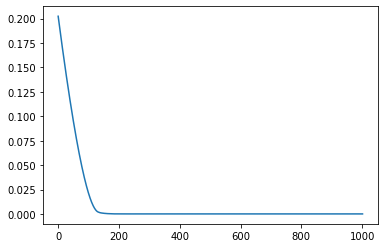

In [11]:
plt.plot(y)

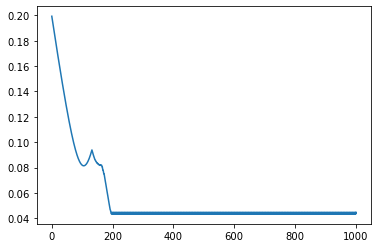

In [12]:
plt.plot(caminho)

In [13]:
x

array([0.017, 0.042, 0.091])

In [14]:
net.get_dist(x)

0.04465422712353233

In [15]:
net.objetivo(x)

7.100409412588807e-05

In [16]:
net.gradient(x)

array([-0.006, -0.001, -0.006])

In [17]:
net.get_dist(x)

0.04465422712353233

In [ ]:
x, y = grad_steps(x0, max_interacoes=400)

In [ ]:
plt.plot(y)

In [ ]:
x

In [ ]:
net.restart()

# Gerando os números aleatórios

In [ ]:
#values = np.random.random((100,3))*0.2 +0.001

In [ ]:
# arq = open("teste1.txt", 'w')
# np.savetxt(arq, values)
# arq.close()

In [ ]:
arq = open("teste1.txt")
values = np.loadtxt(arq)
arq.close()

In [ ]:
net.restart()

In [ ]:
pontos = []
pontos_y = []
for i in range(values.shape[0]):
    try:
        x, y = grad_steps(values[i,:])
        pontos.append(x)
        pontos_y.append(net.objetivo(x))
        print(i, x)
        print()
    except:
        continue

In [ ]:
pontos = np.array(pontos)
pontos_y = np.array(pontos_y)

In [ ]:
# arq = open("teste1/result.txt", 'w')
# np.savetxt(arq, pontos)
# arq.close()

In [ ]:
# arq = open("teste")

In [ ]:
plt.plot(pontos_y)

In [ ]:
pontos_y.mean()

In [ ]:
plt.plot(pontos_y[np.where(pontos_y<=pontos_y.mean())])

In [ ]:
indices = np.where(pontos_y<=pontos_y.mean())

# Calculando Centróide dos pontos resultantes

## Centróide:

In [23]:
def calc_centroide(vetor_pontos):
    tamanho = vetor_pontos.shape[0]
    v = []
    for i in range(vetor_pontos.shape[1]):
        v.append(vetor_pontos[:,i].sum()/tamanho)
    return v
    

In [ ]:
v = calc_centroide(pontos)

In [ ]:
v

In [ ]:
net.target

### Calculando Centróide dos pontos abaixo da média

In [ ]:
calc_centroide(pontos[indices])

## Distancia do Centróide ao ponto Target

In [ ]:
net.get_dist(v) # isso tem que tender a 0

In [ ]:
net.get_dist(calc_centroide(pontos[indices]))

# Gerando uma quantidade maior de pontos - Teste 2

In [ ]:
# values = np.random.random((500,3))*0.2 +0.001

In [ ]:
# arq = open("teste2/teste2.txt", 'w')
# np.savetxt(arq, values)
# arq.close()

In [ ]:
arq = open("teste2/teste2.txt")
values = np.loadtxt(arq)
arq.close()

In [ ]:
net.restart()

In [ ]:
pontos = []
pontos_y = []
for i in range(values.shape[0]):
    try:
        x, y = grad_steps(values[i,:])
        pontos.append(x)
        pontos_y.append(net.objetivo(x))
        print(i, x)
        print()
    except:
        continue

In [ ]:
pontos = np.array(pontos)
pontos_y = np.array(pontos_y)

In [ ]:
#arq = open("teste2/result.txt", 'w')
#np.savetxt(arq, pontos)
#arq.close()

In [21]:
arq = open("teste2/result.txt")
pontos = np.loadtxt(arq)

In [24]:
v = calc_centroide(pontos)

In [25]:
net.get_dist(v) # isso tem que tender a 0

0.005971095993946788

In [33]:
pontos[:,0]

array([0.00910282, 0.01206841, 0.01128139, 0.00900441, 0.01005598,
       0.00921083, 0.01452041, 0.01163472, 0.0121436 , 0.00390564,
       0.01222696, 0.0069874 , 0.01807905, 0.01031739, 0.00998553,
       0.01138945, 0.01067452, 0.01040178, 0.00938754, 0.01090206,
       0.0122344 , 0.01081996, 0.00768693, 0.01065488, 0.01205481,
       0.01110813, 0.00820881, 0.01186794, 0.00987982, 0.01037302,
       0.01206772, 0.00723763, 0.00979189, 0.01020003, 0.00966532,
       0.01215464, 0.01063309, 0.01039418, 0.0114284 , 0.01515304,
       0.00769742, 0.01179919, 0.01219339, 0.00830849, 0.01185376,
       0.00710374, 0.0105032 , 0.01173857, 0.0117848 , 0.00781343,
       0.00874408, 0.00943339, 0.00832226, 0.00986833, 0.01059787,
       0.01018805, 0.01169572, 0.01000436, 0.00995531, 0.01022924,
       0.01290166, 0.00971781, 0.01031496, 0.00880606, 0.00795433,
       0.00627805, 0.01020917, 0.00955045, 0.00813367, 0.0094924 ,
       0.00942635, 0.0119642 , 0.01300801, 0.01183221, 0.01222

/home/augusto/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


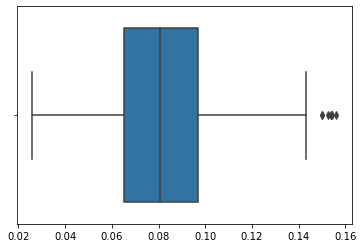

In [34]:
sns.boxplot(pontos[:,1])

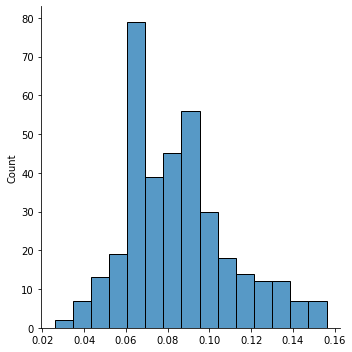

In [37]:
sns.displot(pontos[:,1])

In [38]:
df = pd.DataFrame(pontos, columns=['g1', 'g2', 'g3'])

In [39]:
df

,g1,g2,g3
0,0.009103,0.119947,0.114067
1,0.012068,0.081576,0.112906
2,0.011281,0.087717,0.114269
3,0.009004,0.083831,0.112751
4,0.010056,0.094154,0.117217
...,...,...,...
355,0.012275,0.071498,0.111309
356,0.007623,0.088341,0.119581
357,0.009109,0.141640,0.111414
358,0.009445,0.113998,0.108344


In [41]:
df.median()

g1    0.010364
g2    0.080720
g3    0.112613
dtype: float64

In [42]:
net.get_dist(df.median())

0.002964809852170824

In [43]:
net.get_dist(df.mean())

0.005971095993946721

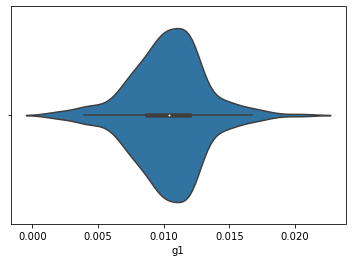

In [45]:
sns.violinplot(df['g1'])

/home/augusto/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


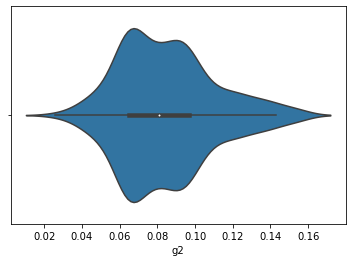

In [46]:
sns.violinplot(df['g2'])

/home/augusto/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


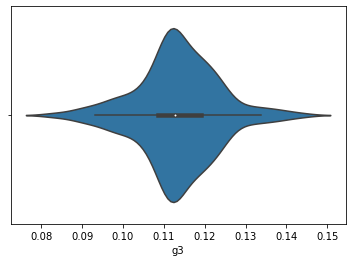

In [47]:
sns.violinplot(df['g3'])

In [48]:
df.describe()

,g1,g2,g3
count,360.000000,360.000000,360.000000
mean,0.010301,0.084732,0.113356
std,0.002856,0.025345,0.010021
min,0.001262,0.025831,0.082401
25%,0.008741,0.065169,0.108572
50%,0.010364,0.080720,0.112613
75%,0.011949,0.096758,0.119129
max,0.020917,0.156139,0.144585
